# Programación Python para Machine Learning.

## Autor: Victor Simo Lozano

## Actividad 3
<p>Tratamiento de valores perdidos.</p>
    

<hr style="border-color:red">

In [88]:
# Generales 
from pandas import read_csv, DataFrame
import numpy as np
import matplotlib.pyplot as plt

<div style="font-size:14px; text-align:justify"><b>PRIMERA PARTE.-</b><br></div>

Cargar el Dataset "*Breast Cancer Wisconsin*" del repositorio UCI Machine Learning y desarrollar los siguientes puntos:
- Localizar el numero de datos faltantes en el dataset.
- Aplicar estrategias de eliminación de valores faltantes vistas.
- Aplicar estratrgias de imputación univariantes y multivariantes vistas.
- Comparar gráficamente los resultados tras la imputación.

***Fuente:*** *https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28original%29*

In [106]:
names=['id number', 'Clump Tickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal adhesion', 'Single Epithelial Cell Size',
      'Bare Nuclei', 'Bland Chromatin', 'Normal Nuc leoli', 'Mitoses', 'Class']

# Carga del dataset
df=read_csv('breast-cancer-wisconsin.csv', names=names)

# Explicación valores objetivo
df['Class']=df['Class'].replace(2,'Benign')
df['Class']=df['Class'].replace(4,'Malignant')

# Representación de los datos
df

,id number,Clump Tickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nuc leoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,Benign
1,1002945,5,4,4,5,7,10,3,2,1,Benign
2,1015425,3,1,1,1,2,2,3,1,1,Benign
3,1016277,6,8,8,1,3,4,3,7,1,Benign
4,1017023,4,1,1,3,2,1,3,1,1,Benign
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,Benign
695,841769,2,1,1,1,2,1,1,1,1,Benign
696,888820,5,10,10,3,7,3,8,10,2,Malignant
697,897471,4,8,6,4,3,4,10,6,1,Malignant


<div style="font-size:14px; text-align:justify"><b>1: </b>Localizar numero de datos faltantes.</div>

In [102]:
df.info(), df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id number                    699 non-null    int64  
 1   Clump Tickness               699 non-null    int64  
 2   Uniformity of Cell Size      699 non-null    int64  
 3   Uniformity of Cell Shape     699 non-null    int64  
 4   Marginal adhesion            699 non-null    int64  
 5   Single Epithelial Cell Size  699 non-null    int64  
 6   Bare Nuclei                  683 non-null    float64
 7   Bland Chromatin              699 non-null    int64  
 8   Normal Nuc leoli             699 non-null    int64  
 9   Mitoses                      699 non-null    int64  
 10  Class                        699 non-null    object 
dtypes: float64(1), int64(9), object(1)
memory usage: 60.2+ KB


(None,
 id number                       0
 Clump Tickness                  0
 Uniformity of Cell Size         0
 Uniformity of Cell Shape        0
 Marginal adhesion               0
 Single Epithelial Cell Size     0
 Bare Nuclei                    16
 Bland Chromatin                 0
 Normal Nuc leoli                0
 Mitoses                         0
 Class                           0
 dtype: int64)

Mediante el método *.info()* se puede observar que de las 699 filas que tiene el dataframe, todos los atributos y variable objetivo tienen 699 datos, es decir, no se aprecia ningún datos faltante.<br>
Si seguimos analizando, vemos que todos los datos, según la presentación del dataframe, son numericos (de 0 a 10 según la información de la fuente). Pero, para el atributo **Bare Nuclei** tenemos como resultado de *Dtype* el tipo *object*, esto nos indica que existe algún valor que no es numerico y por ende toda la columna se "corrompe". No obstante, vemos que no existe valores nulos para ninguna de las columnas.

In [96]:
df['Bare Nuclei'].unique(), df['Class'].unique()

(array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
       dtype=object),
 array(['Benign', 'Malignant'], dtype=object))

Al mostrar los datos únicos del atributo en cuestión, se observa que existe el caracter '?' para los valores perdidos, por tanto, se va a transformar en un tipo **np.NaN**.<br>
Adicionalmente, se representa los valores unicos para el atributo Class, siendo todos ellos los correctos y sin datos faltantes.

In [160]:
# Convertir los ? a valor np.NaN
df[df=='?']=np.NaN

# Comprobar valores nulos
df.isnull().sum()

id number                       0
Clump Tickness                  0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nuc leoli                0
Mitoses                         0
Class                           0
dtype: int64

Ahora si, una vez existe en nuestra columnas **NaN**, el cual se reconoce como un valor nulo, podemos conocer el total de los datos faltantes. En cuyo caso es **16 datos perdidos**.

<div style="font-size:14px; text-align:justify"><b>2: </b>Aplicar estrategias de eliminación de valores faltantes vistas.</div>

Para poder ver el cambio que puede sufrir el dataframe con la eliminación de valores para el atributo *Bare Nuclei*, primero se convierte esta columna en tipo numérico, de tal modo, podremos comparar datos de la estadistica descriptiva del atributo.

In [161]:
# Conversión a tipo float y muestra de parámetros
df[['Bare Nuclei']] = df[['Bare Nuclei']].astype(float)

df.describe(include='all')

,id number,Clump Tickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nuc leoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Benign
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,458
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,NaN
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,NaN
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,NaN
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,NaN
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,NaN


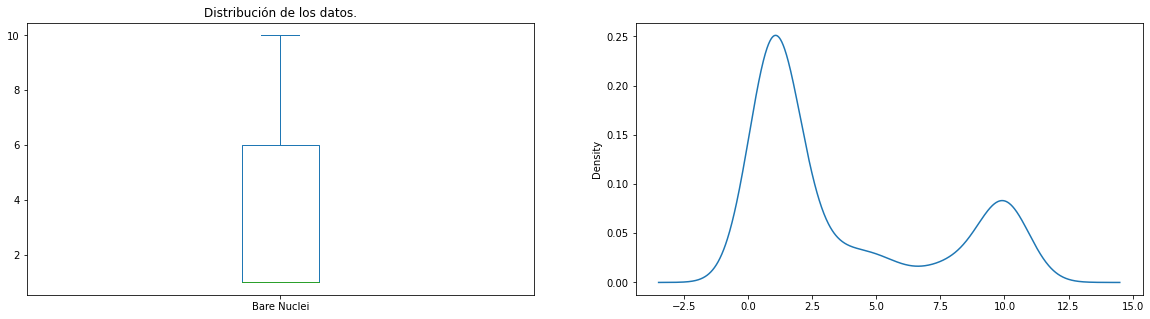

In [162]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20,5))

df['Bare Nuclei'].plot(kind='box', ax=axes[0]).set_title('Distribución de los datos.')
df['Bare Nuclei'].plot(kind='density', ax=axes[1])

plt.show()

Con ayuda de los gráficos mostrados, se observa como los datos se concentran en torno al 1 y al 10, con un sesgo positivo, hacia la derecha. Además, no se observa valores atípicos puesto que todas las instancias se encuentran dentro del rango de 0 a 10.

<div style="font-size:14px; text-align:center"><b>Eliminación de instancias o atributos con datos perdidos.</b><br></div>

Para esta metodología, se podría eliminar de acuerdo con:
- Filas y/o columnas con al menos un valor faltante.
- Filas y/o columnas con todos los atributos faltantes.
- Filas y/o columnas con 'n' valores faltantes.

Como se ha comprobado, unicamente existe una columa con datos faltantes, *Bare Nuclei*, por lo que eliminar la columa podría ser una solución. También, en el caso de querer mantener la columna, se podría eliminar todas las instancias con NaN ya que se habla de 16 filas.

No obstante, para este caso, únicamente se va a eliminar las instancias que contengan datos perdidos en nuestro set de datos. Esto se debe a que es la única metodología con la que se podría realizar alguna comparación respecto a los datos originales. En el caso de que eliminasemos la columna, se debería comparar modelos y esta práctica no se basa en el cálculo de modelos.

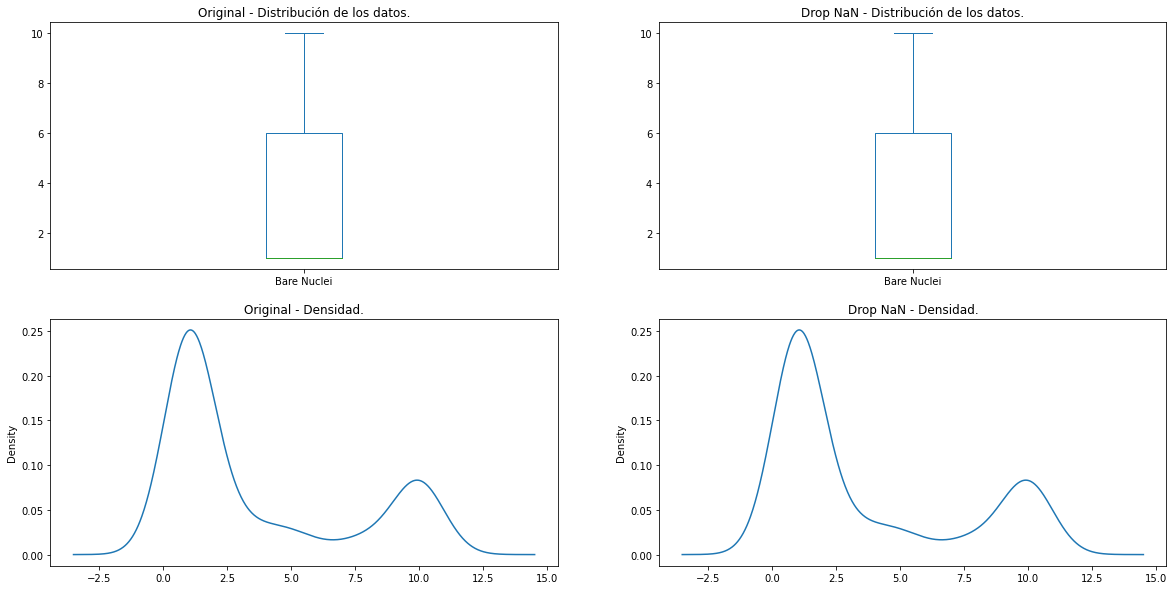

(count    683.000000
 mean       3.544656
 std        3.643857
 min        1.000000
 25%        1.000000
 50%        1.000000
 75%        6.000000
 max       10.000000
 Name: Bare Nuclei, dtype: float64,
 count    683.000000
 mean       3.544656
 std        3.643857
 min        1.000000
 25%        1.000000
 50%        1.000000
 75%        6.000000
 max       10.000000
 Name: Bare Nuclei, dtype: float64,
 None)

In [164]:
# Eliminar filas con NaN
df_drop_NaN=df.dropna(axis=0)

# Comparación con modelo original
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(20,10))

df['Bare Nuclei'].plot(kind='box', ax=axes[0, 0]).set_title('Original - Distribución de los datos.')
df['Bare Nuclei'].plot(kind='density', ax=axes[1, 0]).set_title('Original - Densidad.')

df_drop_NaN['Bare Nuclei'].plot(kind='box', ax=axes[0, 1]).set_title('Drop NaN - Distribución de los datos.')
df_drop_NaN['Bare Nuclei'].plot(kind='density', ax=axes[1, 1]).set_title('Drop NaN - Densidad.')

df_drop_NaN['Bare Nuclei'].describe(), df['Bare Nuclei'].describe(), plt.show()

Como se puede observar, la eliminación de todas las instancias con valores nulos, no implica ninguna alteración en la estadistica descriptiva de este atributo.

<div style="font-size:14px; text-align:center"><b>Viabilidad de la eliminación de datos.</b><br></div>

Como se ha mencionado, existe la opción de eliminar las filas y/o columnas con datos faltantes. A continuación, se verá las opciones para la toma de decisiones.

In [224]:
# Correlación de los atributos
corr=df.corr()

corr.style.background_gradient(cmap='pink')

,id number,Clump Tickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nuc leoli,Mitoses
id number,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.099248,-0.060051,-0.052072,-0.034901
Clump Tickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.593091,0.558428,0.535835,0.350034
Uniformity of Cell Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.691709,0.755721,0.722865,0.458693
Uniformity of Cell Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.713878,0.735948,0.719446,0.438911
Marginal adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.670648,0.666715,0.603352,0.417633
Single Epithelial Cell Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.585716,0.616102,0.628881,0.479101
Bare Nuclei,-0.099248,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210
Bland Chromatin,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.680615,1.000000,0.665878,0.344169
Normal Nuc leoli,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.584280,0.665878,1.000000,0.428336
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.339210,0.344169,0.428336,1.000000


Para el metodo de eliminación de columnas, se puede emplear la matriz de correlaciones de los atributos.<br>
En el caso de *Bare Nuclei*, vemos que tiene una correlación superior al 0.5 en 7 de 9 atributos. Y una correlación de 0.71 con *Uniformity of Cell Shape*. Aunque, no se trata de correlaciones muy fuertes por lo que no sería buena idea la eliminación de este atributo.

In [221]:
# Dataframe por clases
df_benign=df[df['Class']=='Benign']
df_malignant=df[df['Class']=='Malignant']

# Calculo de pesos
perc_nan_benign=(df_benign['Bare Nuclei'].isnull().sum()/ df_benign['Class'].count())*100
perc_nan_malignant=(df_malignant['Bare Nuclei'].isnull().sum()/ df_malignant['Class'].count())*100
perc_benign=(df_benign['Class'].count()/df['Class'].count())*100
perc_malignant=(df_malignant['Class'].count()/df['Class'].count())*100

print(f'''El {perc_nan_benign:0.2f}% de las instancias de la clase Benigna son NaN.\n
El {perc_nan_malignant:0.2f}% de las instancias de la clase Maligna son NaN.\n
El {perc_benign:0.2f}% de los datos son de la clase Benigna.\n
El {perc_malignant:0.2f}% de los datos son de la clase Maligna.''')

El 3.06% de las instancias de la clase Benigna son NaN.

El 0.83% de las instancias de la clase Maligna son NaN.

El 65.52% de los datos son de la clase Benigna.

El 34.48% de los datos son de la clase Maligna.


En base a los resultados obtenidos, teniendo en cuenta que solo el 0.8% de los datos de la clase minoritaria (clase Maligna con un 34.48%) y que el 3.06% para la clase mayoritaria son valores perdidos. Se considera que aplicar la eliminación de filas de valores perdidos, no afectaría en la solución final de modelo.

<div style="font-size:14px; text-align:justify"><b>3: </b>Aplicar estrategias de imputación univariantes y multivariantes vistas.</div>

Como metodo alternativo a lidiar con valores perdidos, existe la imputación de nuevos valores.

<div style="font-size:14px; text-align:center"><b>Imputación Univariante.</b><br></div>

In [40]:
len(df['id number']), len(df)

(699, 699)

In [13]:
df.dtypes

id number                       int64
Clump Tickness                  int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                          object
dtype: object

<div style="font-size:14px; text-align:justify"><b>1: </b>Identificación variables susceptibles de aplicar transformación.</div>

Como transformaciones a realizar a un atributo del dataset, tenemos:
- Tratamiento de datos categóricos.
- Reescalado de datos.
- Estandarización de datos.

Para conocer los atributos susceptibles de dischas trnasformaciones, es necesario conocer la descripción de los mismos para el caso de datos categóricos en las variables de entrada, ya que debemos tener valores numericos en estas para poder ser tratados.<br>
En el caso de el reescalado y/o estandarización, se deberá conocer la distribución de los datos y evitar por ejemplo, un sesgo de datos.

In [2]:
# Constantes del dataframe
ATRIB_NAMES=['age', 'gen', 'tbili', 'dbili', 'alkphos', 'sgpt','sgot', 'tp', 'alb', 'ag' ,'class']
FILENAME='Indian Liver Patient Dataset (ILPD).csv'

# Lectura del dataset
df=read_csv(filepath_or_buffer=FILENAME, names=ATRIB_NAMES)

# Separar en datos de entrada y variable independiente
x=df[df.columns[:-1]].copy()
y=df[df.columns[-1:]].copy()
display(x,y)

,age,gen,tbili,dbili,alkphos,sgpt,sgot,tp,alb,ag
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00


,class
0,1
1,1
2,1
3,1
4,1
...,...
578,2
579,1
580,1
581,1


In [3]:
# Mostrar caracteristicas de los atributos del dataset
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      583 non-null    int64  
 1   gen      583 non-null    object 
 2   tbili    583 non-null    float64
 3   dbili    583 non-null    float64
 4   alkphos  583 non-null    int64  
 5   sgpt     583 non-null    int64  
 6   sgot     583 non-null    int64  
 7   tp       583 non-null    float64
 8   alb      583 non-null    float64
 9   ag       579 non-null    float64
dtypes: float64(5), int64(4), object(1)
memory usage: 45.7+ KB


Con la información obtenida del dataframe, la variable *gen* se describe como *object*, por lo que debe ser transformada en un valor que posteriormente el modelo pueda interpretar. Por tanto, se le aplica **OneHotEncoder** de Scikit-learn para obtener un valor numerico de la caracteristica.

In [4]:
from sklearn.preprocessing import OneHotEncoder

# Creamos  una instancia de OneHotEncoder con los paramteros pertinentes
ohe=OneHotEncoder(drop='if_binary')

# Crear un daraframe auxiliar con las columnas categoricas a procesar
x_cat=x.select_dtypes(include=['object'])

# Transformación de las variables categóricas con la instancia OHE
ohe.fit(x_cat)
x_cat_trs=ohe.transform(x_cat).toarray()

# Comparación de los datos transformados
x_cat, x_cat_trs[:5], x_cat_trs[-5:], type(x_cat_trs[0][0])

(        gen
 0    Female
 1      Male
 2      Male
 3      Male
 4      Male
 ..      ...
 578    Male
 579    Male
 580    Male
 581    Male
 582    Male
 
 [583 rows x 1 columns],
 array([[0.],
        [1.],
        [1.],
        [1.],
        [1.]]),
 array([[1.],
        [1.],
        [1.],
        [1.],
        [1.]]),
 numpy.float64)

Con la transformación OHE, se ve en la comparación como los parámetros *Female*  han tomado el valor *0* y *Male* el valor *1*, cuyo formato es *float64*.

Para la tranformación de los atributos numéricos, se hará en base a al **análisis visual de los datos** y que por sus características se vean sujetos a una necesaria transformación.

<AxesSubplot:>

,age,tbili,dbili,alkphos,sgpt,sgot,tp,alb,ag
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


'Sesgo de la distribución:'

age        -0.029385
tbili       4.907474
dbili       3.212403
alkphos     3.765106
sgpt        6.549192
sgot       10.546177
tp         -0.285672
alb        -0.043685
ag          0.992299
dtype: float64

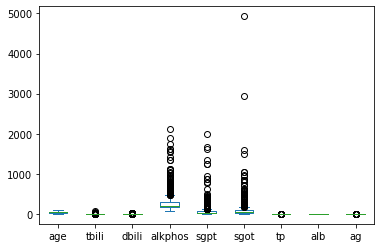

In [5]:
# Dataframe auxiliar con los  atributos numéricos
x_num=x.select_dtypes(include=['int64', 'float64'])

# Representación boxplot de los atributos
display(x_num.plot(kind='box'), x_num.describe(), 'Sesgo de la distribución:', x_num.skew())

Con la ayuda de la descripción de los parámetros y el Diagrama de Caja, observamos que:<br>
- **Age**: Valores minimo y máximo lógicos. Sin sesgado de valores.
- **Tbili** (Total Bilirubin): Valores sesgados a la derecha, con un valor máximo elevado según valores normales (de 1.71 a 20.5 µmol/L).
- **Dbili** (Direct Bilirubin): Valores sesgados a la derecha, con un valor máximo elevado según valores normale (menos de 5.1 µmol/L).
- **Alkphos** (Alkaline Phosphotase): Valores sesgados a la derecha, con valor máximo muy elevado según valores normales (44 a 147 (IU/L)).
- **Sgpt** (Alamine Aminotransferase): Valores sesgados a la derecha, con valor máximo muy elevado según valores normales (4 a 36 U/L).
- **Sgot** (Aspartate Aminotransferase): Valores muy sesgados a la derecha, con valor máximo excesivamente elevado según valores normales (8 a 33 U/L).
- **Tp** (Total Protiens): Valores sin sesgado con valores minimo y máximo dentro del rango de las medidas normales (6.0 a 8.3 g/dL).
- **Alb** (Albumin): Valores sin sesgados, con valor minimo por debajo según valores normales (3.4 a 5.4 g/dL).
- **Ag** (Ratio Albumin and Globulin Ratio): Valores ligeramente sesgados a la derecha, con valores minimo y maximo fuera del rango normal (1 a 2)


En base a estos datos y sin tener algún comentario por parte de expertos de los datos, la transformación de los datos a realizar sería para *Alkphos*, *Sgpt* y *Sgot* con la 
idea de la **Estandarización Robusta de los datos** ya que se trata de atributos cuyos valores difieren del resto. En adición a esto, se debería revisar los datos y comprobar que no 
existe un error en los mismos.<br>
Para *tbili*, *dbili*, *tp* y *ag*, realizaría una **Estandarización estándar de los datos** de modo que no existiera un sesgo en los mismos.

***Nota:*** *Estas conclusiones se han obtenido sin tener información de las unidades de las medidas del Dataset.*

***Fuente:***<br>
*- https://medlineplus.gov/spanish/ency/article/003479.htm#:~:text=Un%20nivel%20normal%20es%3A,1.71%20a%2020.5%20%C2%B5mol%2FL)*<br>
*- https://www.mountsinai.org/health-library/tests/alp-blood-test#:~:text=Normal%20Results,vary%20with%20age%20and%20sex.*<br>
*- https://www.mountsinai.org/health-library/tests/aspartate-aminotransferase-ast-blood-test#:~:text=Normal%20Results,or%20may%20test%20different%20samples.*<br>
*- https://www.mountsinai.org/health-library/tests/alanine-transaminase-alt-blood-test#:~:text=Normal%20Results,vary%20slightly%20among%20different%20laboratories.*<br>
*- https://www.mountsinai.org/health-library/tests/total-protein#:~:text=Normal%20Results,of%20your%20specific%20test%20results.*<br>
*- https://medlineplus.gov/spanish/ency/article/003480.htm#:~:text=El%20rango%20normal%20es%20de,o%20pueden%20evaluar%20diferentes%20muestras.*<br>
*- https://www.healthline.com/health/a-g-ratio-high#:~:text=The%20normal%20range%20for%20albumin,classified%20as%20high%20or%20low.*<br>

<div style="font-size:14px; text-align:justify"><b>2: </b>Aplicacion de los diferentes métodos de escalado a una de las variables.</div>

Para el escalado de los datos, se decide escoger el atributo **sgpt** (Alamine Aminotransferase).

In [6]:
# Dataframe para el resultado de reescalados
df_resc=x_num[['sgpt']].copy()

<div style="font-size:14px; text-align:center"><b>MinMax Scaler</b><br></div>

In [7]:
from sklearn.preprocessing import MinMaxScaler

# Instancia del escalado según Minimo y Maximo
minmax_scaler=MinMaxScaler(feature_range=(0, 1))

# Modelo en base a los datos y reescalado en base a este
minmax_scaler.fit(x_num[['sgpt']])
sgpt_minmax=minmax_scaler.transform(x_num[['sgpt']])

# Datos obtenidos
df_resc=df_resc.assign(sgpt_minmax = sgpt_minmax)

<div style="font-size:14px; text-align:center"><b>Estandarización Estándar</b><br></div>

In [8]:
from sklearn.preprocessing import StandardScaler

# Instancia del escalado
std_scaler=StandardScaler(with_mean=False, with_std=True)

# Modelo en base a los datos y reescalado en base a este
sgpt_std=std_scaler.fit_transform(x_num[['sgpt']])

# Datos obtenidos
df_resc=df_resc.assign(sgpt_std = sgpt_std)

<div style="font-size:14px; text-align:center"><b>Estandarización Robusta</b><br></div>

In [9]:
from sklearn.preprocessing import RobustScaler

# Instancia del escalado y creación de modelo
rbst_scaler=RobustScaler().fit(x_num[['sgpt']])

# Reescalado en base a modelo
sgpt_rbst=rbst_scaler.transform(x_num[['sgpt']])

# Datos obtenidos
df_resc=df_resc.assign(sgpt_rbst = sgpt_rbst)

<div style="font-size:14px; text-align:justify"><b>3: </b>Comparación gráfica del reescalado de la variable escogida.</div>

En base a los cambios realizados, los resultados para cada una de las transformaciones resulta el siguiente:

In [10]:
df_resc.describe()

,sgpt,sgpt_minmax,sgpt_std,sgpt_rbst
count,583.000000,583.000000,583.000000,583.000000
mean,80.713551,0.035534,0.442354,1.219028
std,182.620356,0.091769,1.000859,4.869876
min,10.000000,0.000000,0.054805,-0.666667
25%,23.000000,0.006533,0.126052,-0.320000
50%,35.000000,0.012563,0.191819,0.000000
75%,60.500000,0.025377,0.331573,0.680000
max,2000.000000,1.000000,10.961086,52.400000


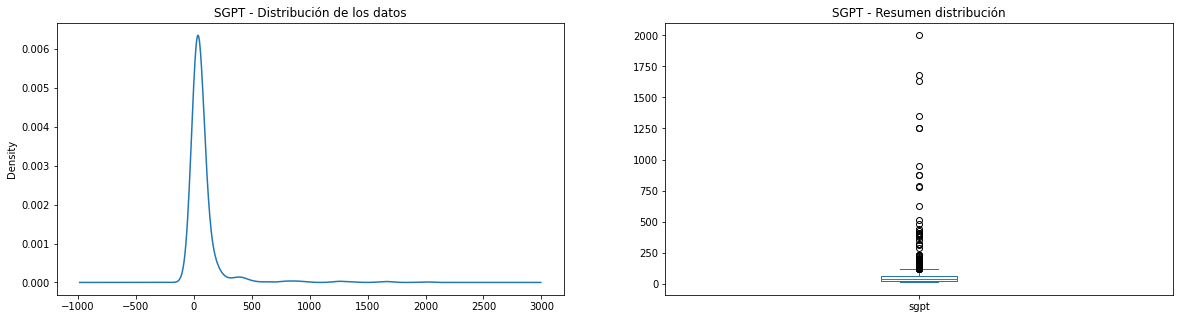

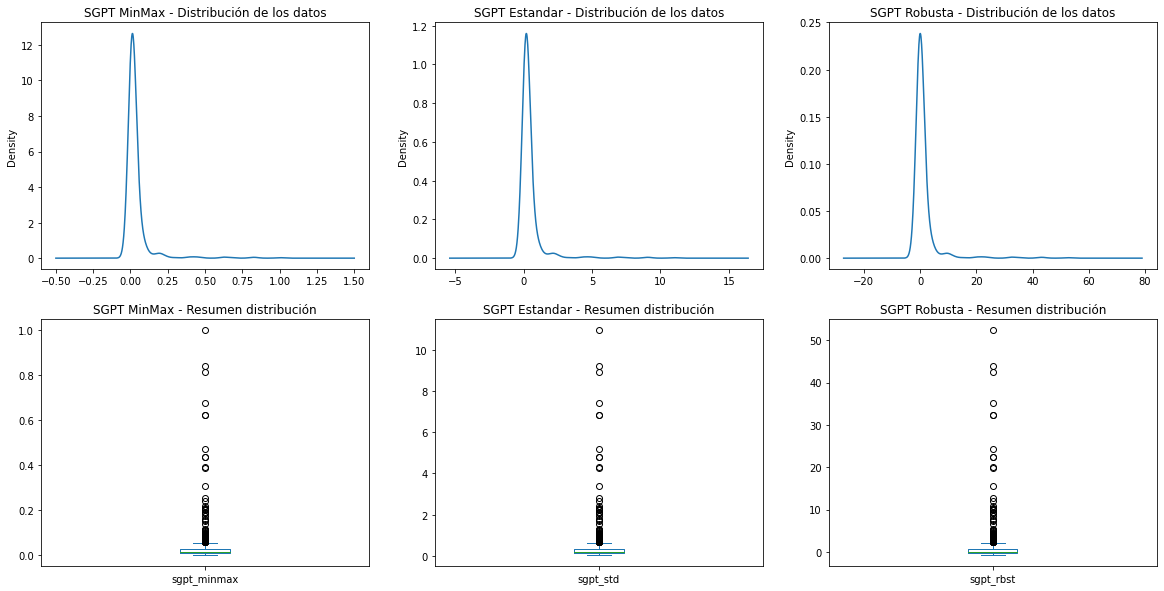

In [11]:
# Representación actual de los datos para dicho atributo
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20,5))

df_resc['sgpt'].plot(kind='density', ax=axes[0]).set(title='SGPT - Distribución de los datos')
df_resc['sgpt'].plot(kind='box', ax=axes[1]).set(title='SGPT - Resumen distribución')

fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,10))

df_resc['sgpt_minmax'].plot(kind='density', ax=axes[0,0]).set(title='SGPT MinMax - Distribución de los datos')
df_resc['sgpt_std'].plot(kind='density', ax=axes[0,1]).set(title='SGPT Estandar - Distribución de los datos')
df_resc['sgpt_rbst'].plot(kind='density', ax=axes[0,2]).set(title='SGPT Robusta - Distribución de los datos')

df_resc['sgpt_minmax'].plot(kind='box', ax=axes[1,0]).set(title='SGPT MinMax - Resumen distribución')
df_resc['sgpt_std'].plot(kind='box', ax=axes[1,1]).set(title='SGPT Estandar - Resumen distribución')
df_resc['sgpt_rbst'].plot(kind='box', ax=axes[1,2]).set(title='SGPT Robusta - Resumen distribución')

plt.show()